In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections
import math 

In [2]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [3]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")
# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")


mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])

In [6]:
def isInt(value):
    try:
        int(value)
        return True
    except:
        return False


numOfObjects = []

# Out put data.
# We need to get the number of objects. 
pathOutput="/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/out.csv"

with open(pathOutput) as fp:  
   line = fp.readline()
   cnt = 1
   while line:
    # print("Line {}: {}".format(cnt, line.strip()))
        lineArr=line.split(",")
        num = 0
        for index in range(1, len(lineArr)):
            if(isInt(lineArr[index])):
               num +=int(lineArr[index])
        numOfObjects.append(num)
        #print(line.split(",")[1])
        line = fp.readline()
        cnt += 1
        
        
        
print(max(numOfObjects))

aList=np.array(numOfObjects)
print(np.mean(aList))
print(np.median(aList))

50
29.186
29.0


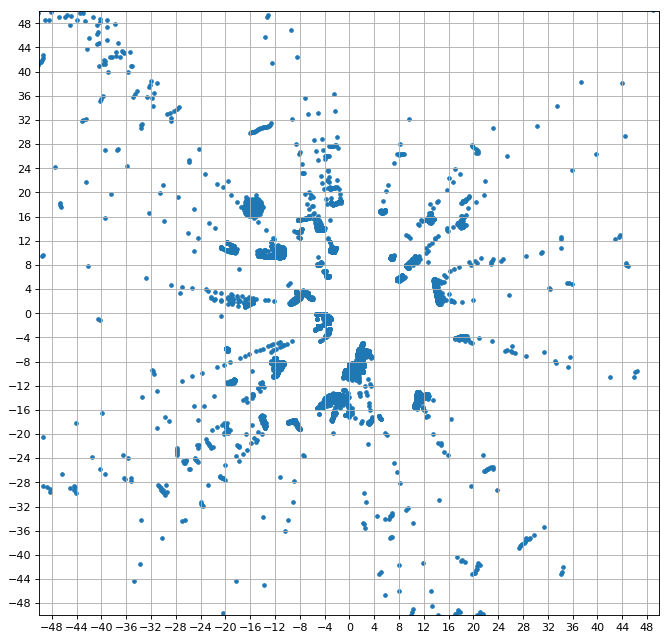

In [7]:
grid_size= 4
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(mX, mZ, s=10)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.grid()
plt.show()

In [8]:
condition = ( (mY > 1) &  ( mY < 5) )

xFiltered = mX[condition]
yFiltered = mY[condition]
zFiltered = mZ[condition]

# print(xFiltered)



data1 =  np.array(list(zip(xFiltered, yFiltered,  zFiltered)))
clustering = DBSCAN(eps=1, min_samples=10).fit(data1)

labels = clustering.labels_

print(max(labels))


4


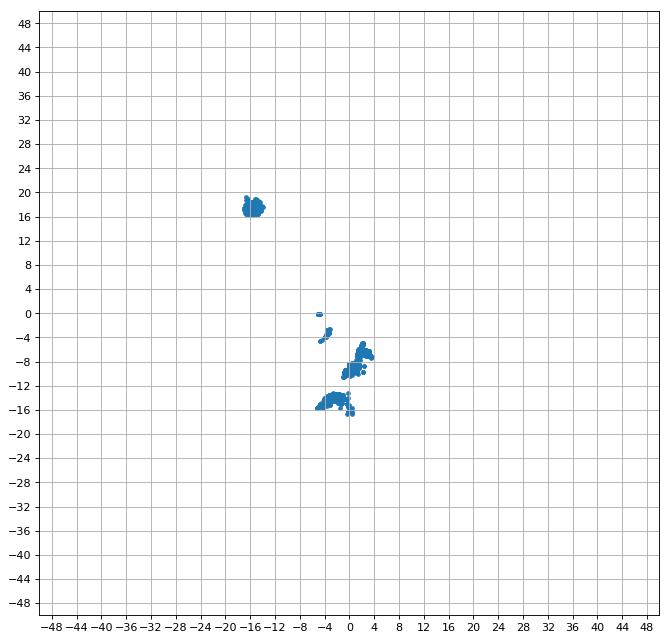

In [11]:
condition2 = (labels != -1)


xFiltered2 = xFiltered[condition2]
yFiltered2 = yFiltered[condition2]
zFiltered2 = zFiltered[condition2]


grid_size= 4
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(xFiltered2, zFiltered2, s=10)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.grid()
plt.show()


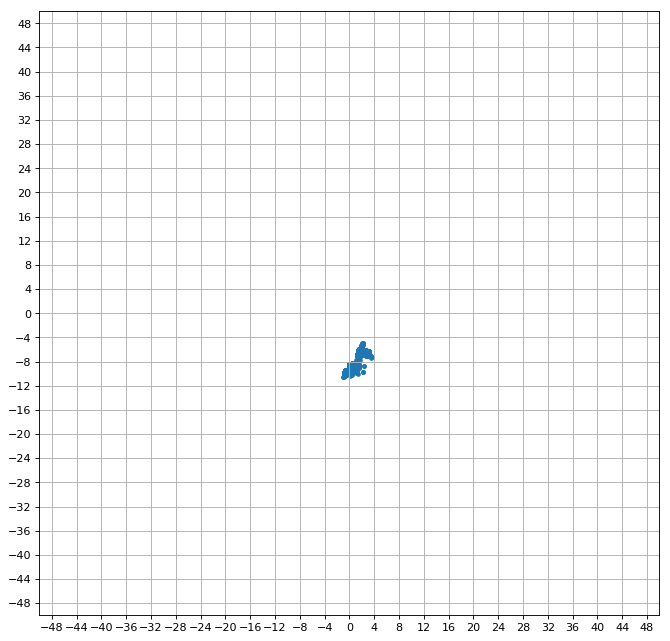

In [17]:
c = (labels ==0)
xNew = xFiltered[c]
yNew = yFiltered[c]
zNew = zFiltered[c]

grid_size= 4
#fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(xNew, zNew, s=10)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.grid()
plt.show()


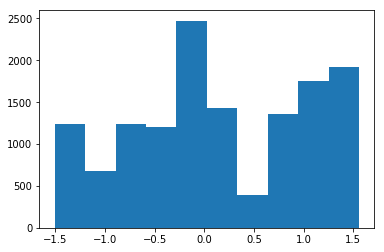

In [219]:
mZdividedByX=np.divide(mX , mZ+0.00000001)

# angels = np.arctan(mZdividedByX)
tmp =np.array(list(map(math.atan, mZdividedByX)))

# angels = np.array(list(map(math.degrees, tmp)))


# print(tan)
# print(angels)
plt.hist(tmp)
plt.show()

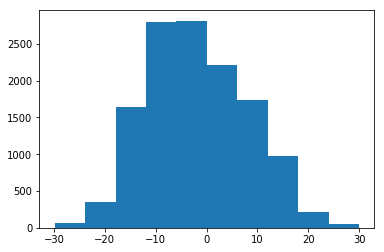

In [220]:
zFiltered =  mZ[( (mZ > -30) & (mZ < 30))]
# mZdividedByX=np.divide(zFiltered , mX+0.00000001)

plt.hist(zFiltered)
plt.show()


In [221]:
condition = ( (mX > 0) &  ( mZ < 0) )

cFinal = condition & condition1


xFiltered = mX[condition]
yFiltered = mY[condition]
zFiltered = mZ[condition]


print(xFiltered)

[2.621516 0.71388  0.716843 ... 0.058192 0.058484 0.362101]


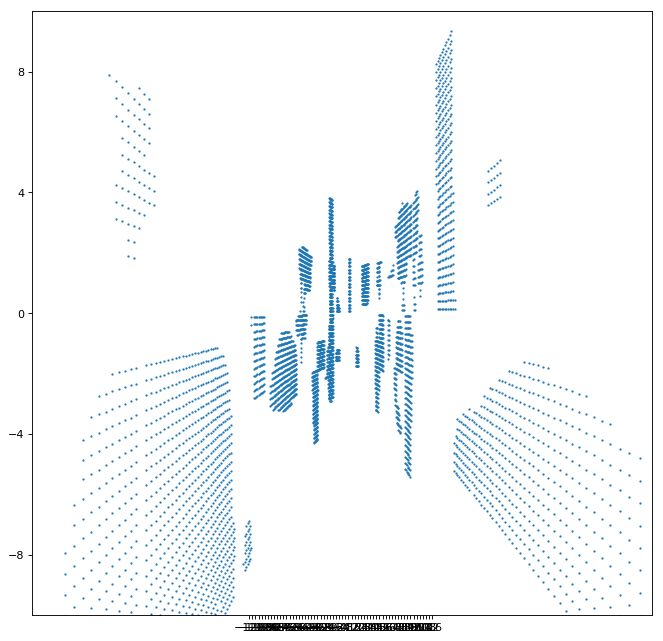

In [222]:
# print(mX)
# angle = 180
# fov = 1.0 / math.tan(angle/2.0)


# condition = ( (mX > 0) &  ( mZ < 0) )
# xFiltered = mX[condition]
# yFiltered = mY[condition]
# zFiltered = mZ[condition]


condition = ( (mY > -2) &  ( mY < 0) )

cFinal = condition & condition1

xFiltered = mX[condition]
yFiltered = mY[condition]
zFiltered = mZ[condition]


d = 15
center_x = 4
center_y = 1
mX_new= np.divide(center_x * xFiltered, zFiltered/d)
mY_new= np.divide(center_y * yFiltered, zFiltered/d)


#print(mX/mZ)
#print(mY/mZ)

# grid_size= 2
fig = plt.figure(figsize=(10, 10), dpi= 80)
ax = fig.gca()

ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(mX_new, mY_new, s=1)

plt.xlim(-400, +400)
plt.ylim(-10, +10)
# plt.grid()
plt.show()

In [191]:
math.tan(-358)

0.14251578633436643

In [192]:
math.degrees(math.atan(0.14))

7.96961039432136